<a href="https://colab.research.google.com/github/ra-vb/python_code/blob/main/Copy_of_Exit_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Load data set**

In [ ]:

df = pd.read_excel("/content/dataset.xlsx")
# to see all features and observations
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.head()

,Unnamed: 0,Price,Location,Bedroom,Bathroom,Carport,Land,Building,Month,City/Regency,Latitude,Longitude
0,0,1.600000e+09,Padalarang,2,1.0,1.0,72.0,50.0,8.0,West Bandung Regency,-6.843600,107.478400
1,1,8.500000e+08,Parongpong,2,1.0,1.0,70.0,80.0,8.0,West Bandung Regency,-6.803228,107.581804
2,2,8.750000e+08,Buah Batu,3,2.0,1.0,60.0,70.0,8.0,Bandung City,-6.965549,107.637926
3,3,1.750000e+09,Bojongsoang,2,3.0,1.0,90.0,94.0,8.0,Bandung Regency,-6.993945,107.643700
4,4,4.900000e+09,Bojongloa Kidul,4,4.0,0.0,200.0,300.0,8.0,Bandung City,-6.947036,107.596271


In [ ]:
data=df.copy()

In [ ]:
data.shape

(32536, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32536 entries, 0 to 32535
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    32536 non-null  int64  
 1   Price         32536 non-null  float64
 2   Location      32527 non-null  object 
 3   Bedroom       32536 non-null  int64  
 4   Bathroom      32521 non-null  float64
 5   Carport       32521 non-null  float64
 6   Land          32533 non-null  float64
 7   Building      32527 non-null  float64
 8   Month         32527 non-null  float64
 9   City/Regency  32527 non-null  object 
 10  Latitude      32526 non-null  float64
 11  Longitude     32527 non-null  float64
dtypes: float64(8), int64(2), object(2)
memory usage: 3.0+ MB


In [ ]:
data.head()

,Unnamed: 0,Price,Location,Bedroom,Bathroom,Carport,Land,Building,Month,City/Regency,Latitude,Longitude
0,0,1.600000e+09,Padalarang,2,1.0,1.0,72.0,50.0,8.0,West Bandung Regency,-6.843600,107.478400
1,1,8.500000e+08,Parongpong,2,1.0,1.0,70.0,80.0,8.0,West Bandung Regency,-6.803228,107.581804
2,2,8.750000e+08,Buah Batu,3,2.0,1.0,60.0,70.0,8.0,Bandung City,-6.965549,107.637926
3,3,1.750000e+09,Bojongsoang,2,3.0,1.0,90.0,94.0,8.0,Bandung Regency,-6.993945,107.643700
4,4,4.900000e+09,Bojongloa Kidul,4,4.0,0.0,200.0,300.0,8.0,Bandung City,-6.947036,107.596271


**EDA**

Univariate analysis

In [ ]:
data.dtypes

,0
Unnamed: 0,int64
Price,float64
Location,object
Bedroom,int64
Bathroom,float64
Carport,float64
Land,float64
Building,float64
Month,float64
City/Regency,object


In [ ]:
data.columns

Index(['Unnamed: 0', 'Price', 'Location', 'Bedroom', 'Bathroom', 'Carport',
       'Land', 'Building', 'Month', 'City/Regency', 'Latitude', 'Longitude'],
      dtype='object')

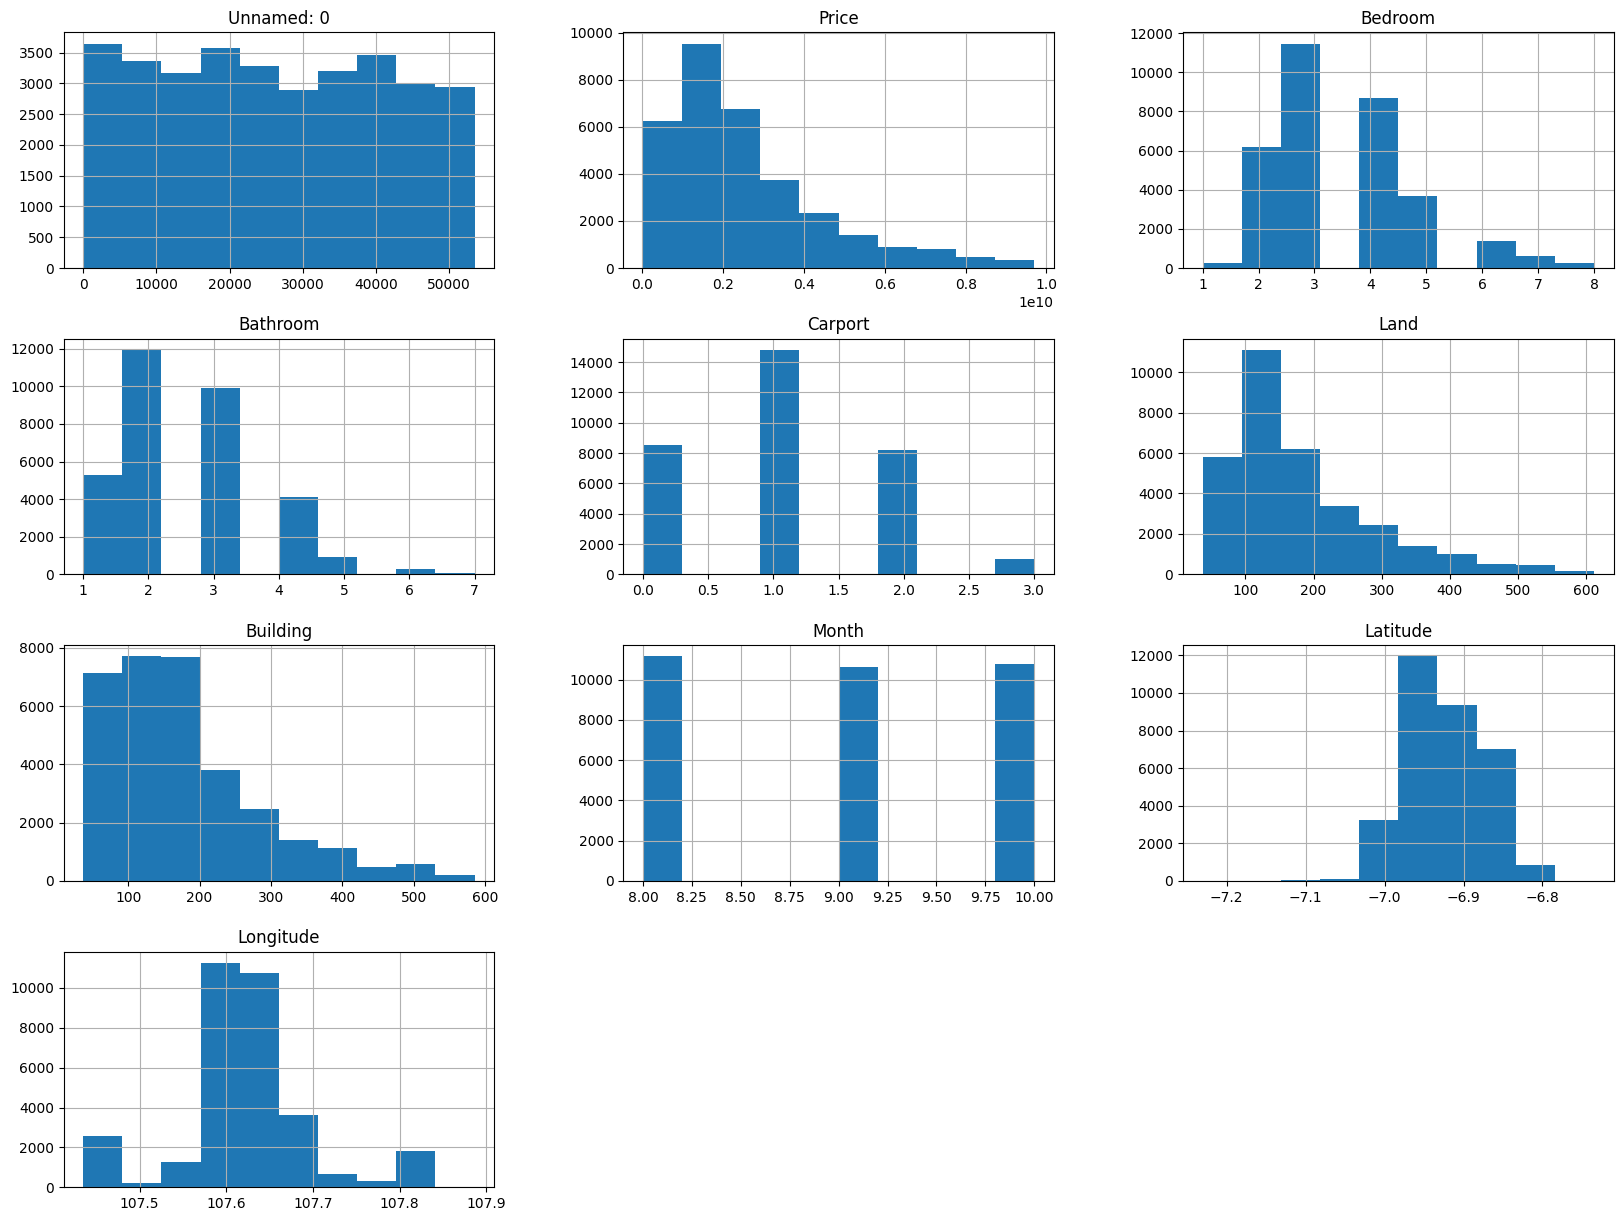

In [ ]:
frequencygraph=data.select_dtypes(include=['float','int'])
frequencygraph.hist(figsize=(20,15))
plt.show()

In [ ]:
from scipy.stats import skew
skewness_value = skew(data['Bedroom'].dropna())
print(f"Skewness of {'Bedroom'}: {skewness_value:.4f}")

Skewness of Bedroom: 0.8477


In [ ]:
from scipy.stats import skew
skewness_value = skew(data['Bathroom'].dropna())
print(f"Skewness of {'Bathroom'}: {skewness_value:.4f}")

Skewness of Bathroom: 0.6638


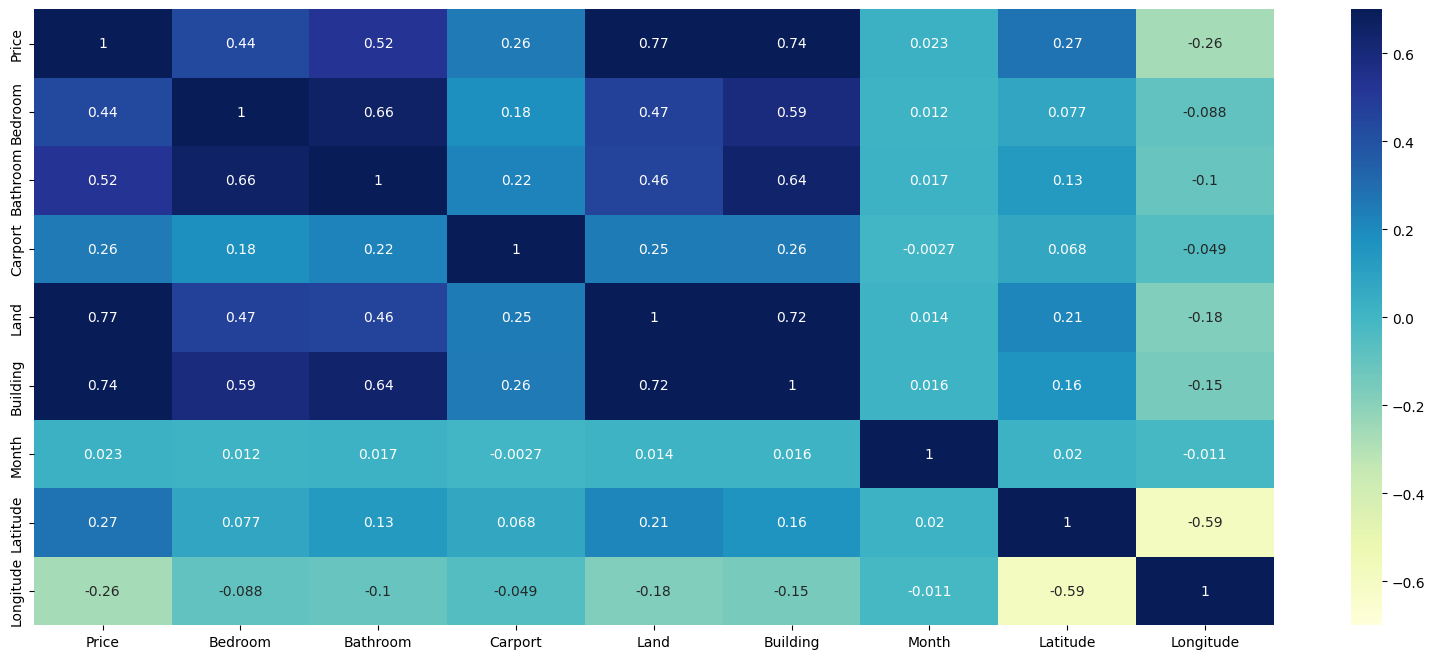

In [ ]:
numeric_columns = ['Price','Bedroom', 'Bathroom', 'Carport', 'Land', 'Building', 'Month', 'Latitude', 'Longitude']
corrmat=data[numeric_columns].corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmat,vmin=-0.7,vmax=0.7,annot=True,cmap='YlGnBu')
plt.show()



*  Building and Land is highly correlated to price
*  Building and Land are highly correlated
*  We can remove Building(.74) from here



**Bivariate analysis**

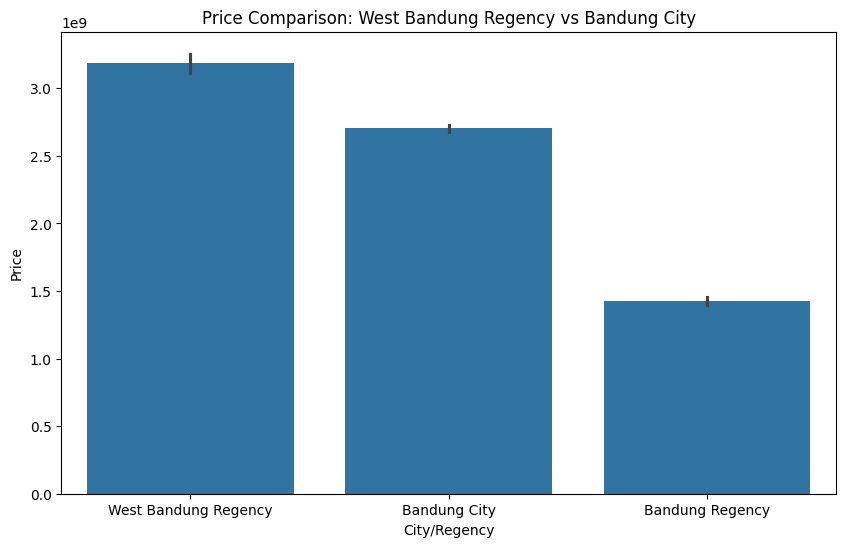

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='City/Regency', y='Price', data=data)  # 'price' is the target column for property prices
plt.title('Price Comparison: West Bandung Regency vs Bandung City')
plt.show()

drop unsignificant feature

In [ ]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)

**Null value handling**

In [ ]:
data.isnull().sum()

,0
Price,0
Location,9
Bedroom,0
Bathroom,15
Carport,15
Land,3
Building,9
Month,9
City/Regency,9
Latitude,10


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32536 entries, 0 to 32535
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Price         32536 non-null  float64
 1   Location      32527 non-null  object 
 2   Bedroom       32536 non-null  int64  
 3   Bathroom      32521 non-null  float64
 4   Carport       32521 non-null  float64
 5   Land          32533 non-null  float64
 6   Building      32527 non-null  float64
 7   Month         32527 non-null  float64
 8   City/Regency  32527 non-null  object 
 9   Latitude      32526 non-null  float64
 10  Longitude     32527 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 2.7+ MB


**Null value handling in Numerical column**

In [ ]:
num_columns = ['Bedroom', 'Bathroom', 'Carport', 'Land', 'Building', 'Month', 'Latitude', 'Longitude']
for col in num_columns:
    data[col].fillna(data[col].median(), inplace=True)

<ipython-input-237-57c5f46b965f>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)


In [ ]:
cat_columns = ['Location', 'City/Regency']
for col in cat_columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

<ipython-input-238-f9c569db11ac>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)


Checking for outliers

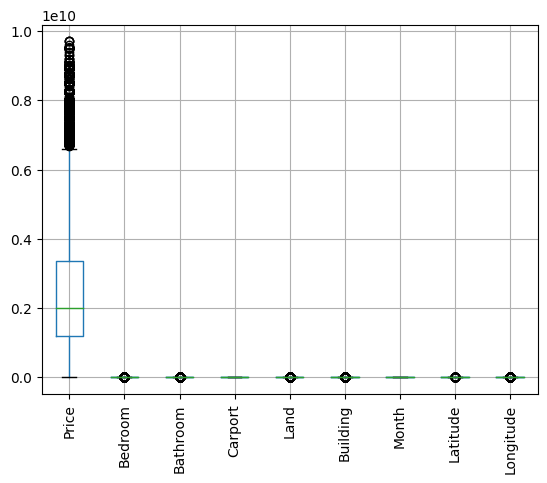

In [ ]:
data.boxplot()
plt.xticks(rotation=90)
plt.show()

In [ ]:
data.drop(['Building'],axis=1,inplace=True)

In [ ]:
data.head()

,Price,Location,Bedroom,Bathroom,Carport,Land,Month,City/Regency,Latitude,Longitude
0,1.600000e+09,Padalarang,2,1.0,1.0,72.0,8.0,West Bandung Regency,-6.843600,107.478400
1,8.500000e+08,Parongpong,2,1.0,1.0,70.0,8.0,West Bandung Regency,-6.803228,107.581804
2,8.750000e+08,Buah Batu,3,2.0,1.0,60.0,8.0,Bandung City,-6.965549,107.637926
3,1.750000e+09,Bojongsoang,2,3.0,1.0,90.0,8.0,Bandung Regency,-6.993945,107.643700
4,4.900000e+09,Bojongloa Kidul,4,4.0,0.0,200.0,8.0,Bandung City,-6.947036,107.596271


In [ ]:
data_out=data.copy()

In [ ]:
outlier = ['Price']
Q1 = data_out[outlier].quantile(0.25)
Q3 = data_out[outlier].quantile(0.75)
IQR = Q3 - Q1
# Define outlier boundaries
outliers_lower = data_out[outlier]<(Q1-1.5*IQR)
outliers_upper = data_out[outlier]>(Q3 + 1.5*IQR)

#clip the outliers
data_out[outlier] = data_out[outlier].clip(lower = Q1-1.5*IQR, upper = Q3+1.5*IQR, axis = 1)

Outlier checking after IQR treatment

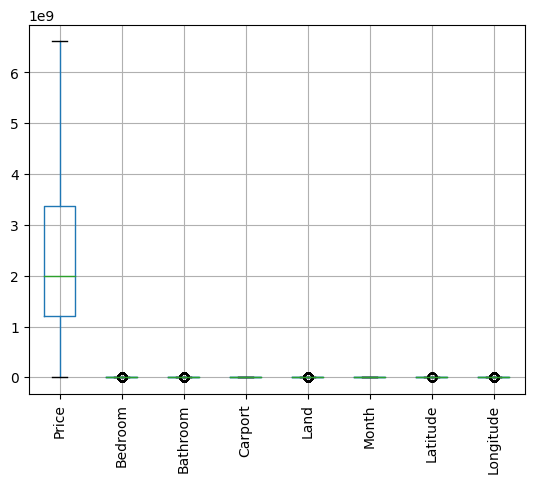

In [ ]:
data_out.boxplot()
plt.xticks(rotation=90)
plt.show()

# **Scaling**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

num_columns = ['Bedroom','Bathroom','Carport','Land','Month','Latitude','Longitude']
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_out[num_columns])

In [ ]:
data_out.head()

,Price,Location,Bedroom,Bathroom,Carport,Land,Month,City/Regency,Latitude,Longitude
0,1.600000e+09,Padalarang,2,1.0,1.0,72.0,8.0,West Bandung Regency,-6.843600,107.478400
1,8.500000e+08,Parongpong,2,1.0,1.0,70.0,8.0,West Bandung Regency,-6.803228,107.581804
2,8.750000e+08,Buah Batu,3,2.0,1.0,60.0,8.0,Bandung City,-6.965549,107.637926
3,1.750000e+09,Bojongsoang,2,3.0,1.0,90.0,8.0,Bandung Regency,-6.993945,107.643700
4,4.900000e+09,Bojongloa Kidul,4,4.0,0.0,200.0,8.0,Bandung City,-6.947036,107.596271


**Encode categorical values**

In [ ]:
data_out['Location'].unique()

array(['Padalarang', 'Parongpong', 'Buah Batu', 'Bojongsoang',
       'Bojongloa Kidul', 'Gedebage', 'Lengkong', 'Regol',
       'Bandung Kulon', 'Cibeunying Kaler', 'Andir', 'Margahayu',
       'Bojongloa Kaler', 'Rancasari', 'Antapani', 'Batununggal',
       'Sukasari', 'Arcamanik', 'Soreang', 'Coblong', 'Cibiru',
       'Sukajadi', 'Margaasih', 'Cidadap', 'Cibeunying Kidul', 'Cileunyi',
       'Cicendo', 'Cicalengka', 'Bandung Wetan', 'Ujungberung',
       'Cimenyan', 'Astanaanyar', 'Banjaran', 'Lembang', 'Bandung Kidul',
       'Paseh', 'Baleendah', 'Katapang', 'Rancaekek', 'Kiaracondong',
       'Cinambo', 'Panyileukan', 'Ciparay', 'Babakan Ciparay', 'Ngamprah',
       'Mandalajati', 'Cisarua', 'Pameungpeuk', 'Cangkuang', 'Cimaung',
       'Dayeuhkolot', 'Cilengkrang', 'Sumur Bandung', 'Kutawaringin',
       'Ciwidey', 'Batujajar', 'Cikalong Wetan', 'Kertasari',
       'Pasirjambu', 'Arjasari', 'Majalaya', 'Nagreg', 'Cililin',
       'Rancabali', 'Cikancung', 'Cipeundeuy'], dtype=

In [ ]:
data_out['Location'].nunique()

66

In [ ]:
data_out['City/Regency'].unique()

array(['West Bandung Regency', 'Bandung City', 'Bandung Regency'],
      dtype=object)

In [ ]:
data_en=data_out.copy()

In [ ]:
categorical_features = ['Location', 'City/Regency']
for feature in categorical_features:
  freq_encoding = data_en.groupby(feature)[feature].transform('count') / len(data_en)
  data_en[feature] = freq_encoding

In [ ]:
data_en.head()

,Price,Location,Bedroom,Bathroom,Carport,Land,Month,City/Regency,Latitude,Longitude
0,1.600000e+09,0.078682,2,1.0,1.0,72.0,8.0,0.105975,-6.843600,107.478400
1,8.500000e+08,0.018042,2,1.0,1.0,70.0,8.0,0.105975,-6.803228,107.581804
2,8.750000e+08,0.085751,3,2.0,1.0,60.0,8.0,0.737890,-6.965549,107.637926
3,1.750000e+09,0.025879,2,3.0,1.0,90.0,8.0,0.156135,-6.993945,107.643700
4,4.900000e+09,0.045211,4,4.0,0.0,200.0,8.0,0.737890,-6.947036,107.596271


**train test split**

In [ ]:
from sklearn.model_selection import train_test_split
x = data_en.drop('Price', axis=1)
y = data_en['Price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Model creation
linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 9.350111100776447e+17
R-squared: 0.6676286741819716
Root Mean Squared Error: 966959725.158005


In [ ]:
from sklearn.linear_model import Lasso

# Create a Lasso regression model
lasso_model = Lasso(alpha=0.1)  # You can adjust the alpha value

# Train the model
lasso_model.fit(x_train, y_train)

# Make predictions
y_pred_lasso = lasso_model.predict(x_test)

# Evaluate the model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
rmse_lasso = root_mean_squared_error(y_test, y_pred_lasso)

print(f"Lasso Regression - Mean Squared Error: {mse_lasso}")
print(f"Lasso Regression - R-squared: {r2_lasso}")
print(f"Lasso Regression - Root Mean Squared Error: {rmse_lasso}")


Lasso Regression - Mean Squared Error: 9.350111099175496e+17
Lasso Regression - R-squared: 0.6676286742388811
Lasso Regression - Root Mean Squared Error: 966959725.0752224


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust parameters as needed

# Train the model
rf_model.fit(x_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(x_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = root_mean_squared_error(y_test, y_pred_rf)

print(f"Random Forest Regression - Mean Squared Error: {mse_rf}")
print(f"Random Forest Regression - R-squared: {r2_rf}")
print(f"Random Forest Regression - Root Mean Squared Error: {rmse_rf}")

Random Forest Regression - Mean Squared Error: 4.182837366347801e+17
Random Forest Regression - R-squared: 0.8513113709398854
Random Forest Regression - Root Mean Squared Error: 646748588.4289042
